<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bloch-states" data-toc-modified-id="Bloch-states-1">Bloch states</a></span></li><li><span><a href="#Energy-bands" data-toc-modified-id="Energy-bands-2">Energy bands</a></span></li><li><span><a href="#Bloch-waves" data-toc-modified-id="Bloch-waves-3">Bloch waves</a></span></li><li><span><a href="#Wannier-states" data-toc-modified-id="Wannier-states-4">Wannier states</a></span></li><li><span><a href="#Hubbard-parameters" data-toc-modified-id="Hubbard-parameters-5">Hubbard parameters</a></span></li></ul></div>

This notebook illustrates the use of the `lattice` module.

The dimensions used in this module are ($a$ is the lattice period):
* $\pi/a$ for the quasimomentum coordinates ;
* $a$ for the real-space coordinates ;
* $E_r = \hbar^2 \pi^2 / 2 m a^2$ for the energies.

We benchmark our results against Jean Dalibard's lecture notes:  
[https://www.college-de-france.fr/media/jean-dalibard/UPL8676362538384804843_cours2.pdf]  
[https://www.college-de-france.fr/media/jean-dalibard/UPL7303764949083833780_cours3.pdf]

Last update: 28/01/21

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import lattice
from phys_constants import*
from scipy.fft import fft, ifft, fftfreq, fftshift
from scipy.integrate import trapz

textprops = {"ha": "right", "va": "top"}

# Bloch states

In [5]:
Varr = [2, 8, 20]  # lattice depth in units of the recoil energy
size = 100  # number of lattice sites
qarr = lattice.quasimomenta(size)  # quasimomenta
n = 0  # band index

energy_bands = []
bloch_states = []
for V in Varr:
    e, bs = lattice.eigenproblem(V, qarr, bands=n, squeeze=True)
    energy_bands.append(e)
    bloch_states.append(bs)

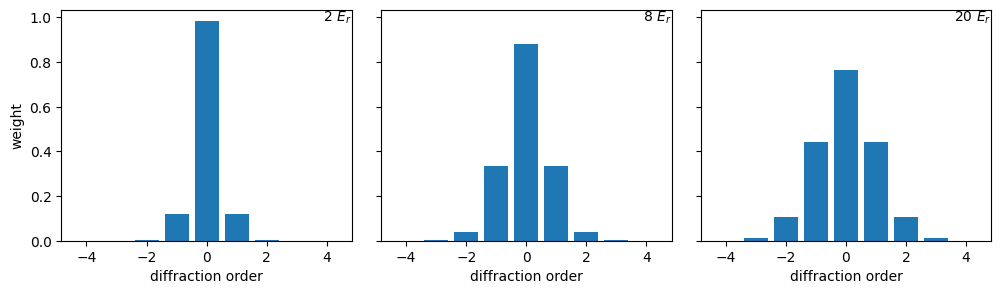

In [6]:
narr = np.arange(size)  # band indices
jarr = lattice.sites(size)  # lattice sites

qmask = qarr == 0  # pick the quasimomentum you want to see
jmask = np.abs(jarr) < 5  # restrict the lattice sites / diffraction orders

fig, axes = plt.subplots(1, len(Varr), figsize=(12, 3), sharey=True)
for i, ax in enumerate(axes):
    ax.bar(jarr[jmask], bloch_states[i][qmask, jmask])
    ax.set_xlabel("diffraction order")
    ax.text(1, 1, f"{Varr[i]} $E_r$", textprops, transform=ax.transAxes)
axes[0].set_ylabel("weight")
plt.subplots_adjust(wspace=.1)
plt.show()

# Energy bands

In [7]:
Varr = [7,12]  # lattice depth in units of the recoil energy
size = 100  # number of lattice sites
qarr = lattice.quasimomenta(size)  # quasimomenta
n = (0, 1, 2)  # band index

energy_bands = []
bloch_states = []
for V in Varr:
    e, bs = lattice.eigenproblem(V, qarr, bands=n)
    energy_bands.append(e)
    bloch_states.append(bs)

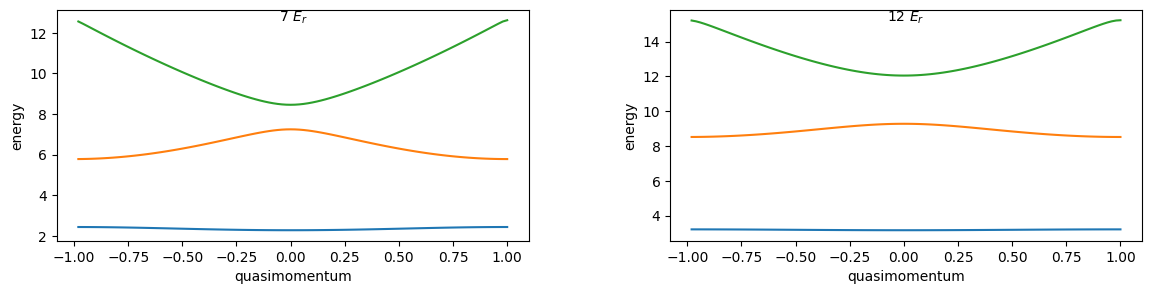

In [8]:
narr = np.arange(size)  # band indices

fig, axes = plt.subplots(1, len(Varr), figsize=(14, 3))
for i, ax in enumerate(axes):
    ax.plot(qarr, energy_bands[i])
    ax.set_xlabel("quasimomentum")
    ax.set_ylabel("energy")
    ax.text(0.5, 1, f"{Varr[i]} $E_r$", ha="center",
            va="top", transform=ax.transAxes)
plt.subplots_adjust(wspace=.3)
plt.show()

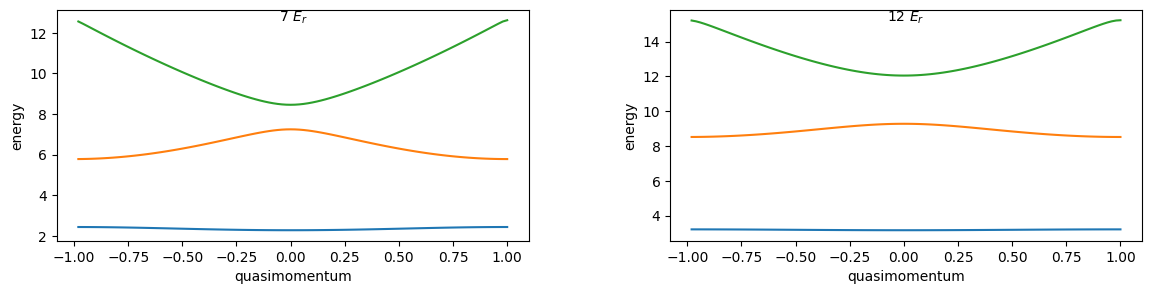

128138.61522708474
184351.3832219971


In [9]:
# If you are only interested in the energy bands you can also use `lattice.energybands`.

other_energy_bands = []
for V in Varr:
    e = lattice.energybands(V, qarr, bands=n)
    other_energy_bands.append(e)

fig, axes = plt.subplots(1, len(Varr), figsize=(14, 3))
for i, ax in enumerate(axes):
    ax.plot(qarr, other_energy_bands[i])
    ax.set_xlabel("quasimomentum")
    ax.set_ylabel("energy")
    ax.text(0.5, 1, f"{Varr[i]} $E_r$", ha="center",
            va="top", transform=ax.transAxes)
plt.subplots_adjust(wspace=.3)
plt.show()

print((energy_bands[0][49][2]-energy_bands[0][49][0])*Erec/h)
print((energy_bands[1][49][2]-energy_bands[1][49][0])*Erec/h)

# Bloch waves

In [10]:
Varr = [2, 8, 20]  # lattice depth in units of the recoil energy
size = 100  # number of lattice sites
qarr = lattice.quasimomenta(size)  # quasimomenta
n = 0  # band index
xarr = np.linspace(-1.5, 1.5, 101)  # real-space position

bloch_waves = []
for i, V in enumerate(Varr):
    _, bs = lattice.eigenproblem(V, qarr, bands=n, kohns_phase=True)
    bw = lattice.bloch(xarr, bs)
    bloch_waves.append(np.real(bw))

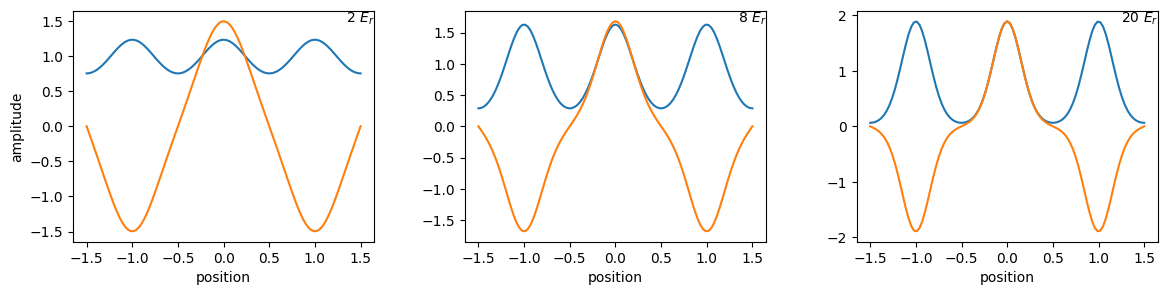

In [11]:
qmask = np.logical_or(qarr == 0, qarr == 1)  # pick the quasimomentum you want to see

fig, axes = plt.subplots(1, len(Varr), figsize=(14, 3))
for i, ax in enumerate(axes):
    ax.plot(xarr, np.swapaxes(bloch_waves[i][qmask, :], 0, 1))
    ax.set_xlabel("position")
    ax.text(1, 1, f"{Varr[i]} $E_r$", textprops, transform=ax.transAxes)
axes[0].set_ylabel("amplitude")
plt.subplots_adjust(wspace=.3)
plt.show()

# Wannier states

In [16]:
Varr = range(5,15,1)  # lattice depth in units of the recoil energy
size = 101  # number of lattice sites
qarr = lattice.quasimomenta(size)  # quasimomenta
n = 0  # band index
Npoint=500
xrange=20
xarr = np.linspace(-xrange/2, xrange/2 ,Npoint)  # real-space position

wannier_functions = []
for V in Varr:
    _, bs = lattice.eigenproblem(V, qarr, bands=n, kohns_phase=True)
    wf = lattice.wannier(xarr, bs)
    wannier_functions.append(np.real(wf))

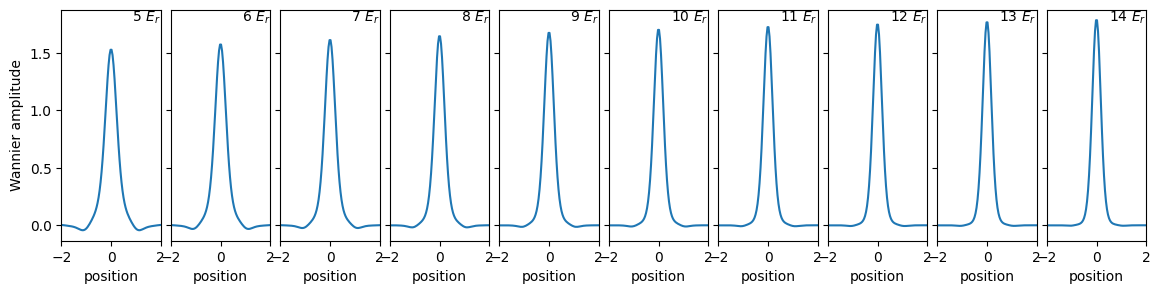

In [17]:
fig, axes = plt.subplots(1, len(Varr), figsize=(14, 3), sharey=True)
for i, ax in enumerate(axes):
    ax.plot(xarr, wannier_functions[i])
    ax.set_xlim(-2,2)
    ax.set_xlabel("position")
    ax.text(1, 1, f"{Varr[i]} $E_r$", textprops, transform=ax.transAxes)
axes[0].set_ylabel("Wannier amplitude")
plt.subplots_adjust(wspace=.1)
plt.show()

In [18]:
dx = xarr[1] - xarr[0]

for wf in wannier_functions:
    print("Norm: ", np.sum(wf**2) * dx)

Norm:  1.000000000000012
Norm:  1.000000000000012
Norm:  1.000000000000012
Norm:  1.0000000000000115
Norm:  1.000000000000012
Norm:  1.0000000000000115
Norm:  1.000000000000012
Norm:  1.000000000000012
Norm:  1.000000000000012
Norm:  1.0000000000000113


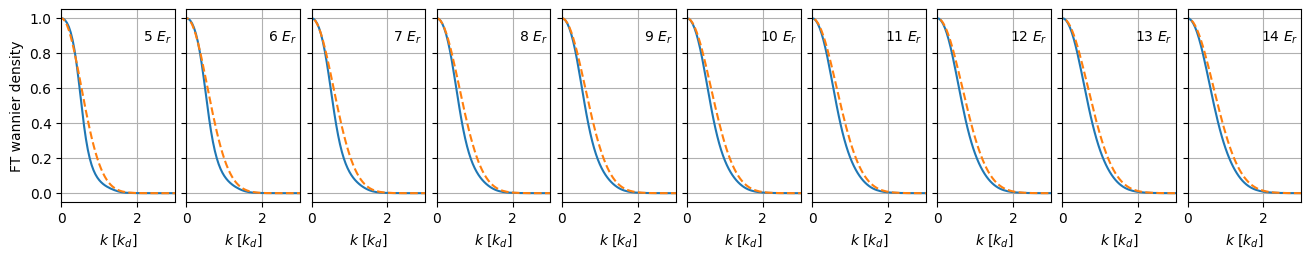

In [19]:
T=xrange/Npoint; # sampling distance in position space
karr = fftfreq(Npoint, T)[:Npoint//2] # generating the array in the momentum space for FT calculation

FTwannier_functions = []
for i in range(len(Varr)):
    FTwannier_functions.append(fft(wannier_functions[i]))
    FTwannier_functions[i]=FTwannier_functions[i]/np.max(FTwannier_functions[i])
    FTwannier_functions[i]=FTwannier_functions[i][:len(FTwannier_functions[i])//2]
    FTwannier_functions[i]=np.concatenate((FTwannier_functions[i][::-1],FTwannier_functions[i][1:]))

karr=np.concatenate((-karr[::-1],karr[1:])) # to have a symmetric plot centered on k=0

# plot the FTwannier_functions
fig, axes = plt.subplots(1, len(Varr), figsize=(16, 2.5), sharey=True)
for i, ax in enumerate(axes):
    ax.plot(karr, np.abs(FTwannier_functions[i])**2)#,label='$s={}E_r$'.format(Varr[i]))
    ax.plot(karr,np.exp(-karr**2*(4/np.sqrt(Varr[i]))),'--')#label='Approx. Gauss. $s={}E_r$'.format(Varr[0]))
    ax.set_xlim(0,3)
    ax.set_xlabel('$k$ [$k_d$]')
    ax.grid()
    ax.text(.97, .9, f"{Varr[i]} $E_r$", textprops, transform=ax.transAxes)
axes[0].set_ylabel("FT wannier density")
plt.subplots_adjust(wspace=.1)
#plt.ylabel('Density [a.u.]')

plt.show()

1.414213562373095
0.29730177875068026


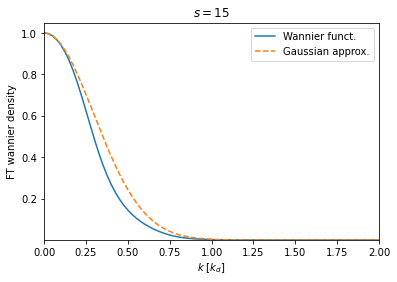

In [13]:
print(4/np.sqrt(Varr[1]))
sigma=np.sqrt(np.sqrt(Varr[1])/8)
print(sigma/2)

plt.figure()
plt.plot(karr/2, np.abs(FTwannier_functions[1])**2,label="Wannier funct.")#,label='$s={}E_r$'.format(Varr[i]))
plt.plot(karr/2,np.exp(-karr**2*(4/np.sqrt(Varr[1]))),'--',label="Gaussian approx.")
#plt.plot(karr,np.exp(-karr**2/2/(sigma/2)**2),'--')
plt.xlabel('$k$ [$k_d$]')
plt.ylabel("FT wannier density")
plt.xlim(0,2)
plt.legend()
plt.title("$s=15$")
#plt.semilogy()
plt.ylim(1e-6,1.05)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[ 1.06152883e-08 -1.00217523e-07 -2.77935666e-06 -1.21259619e-05
  7.69169291e-04  1.80221659e-02 -3.11628621e-02]


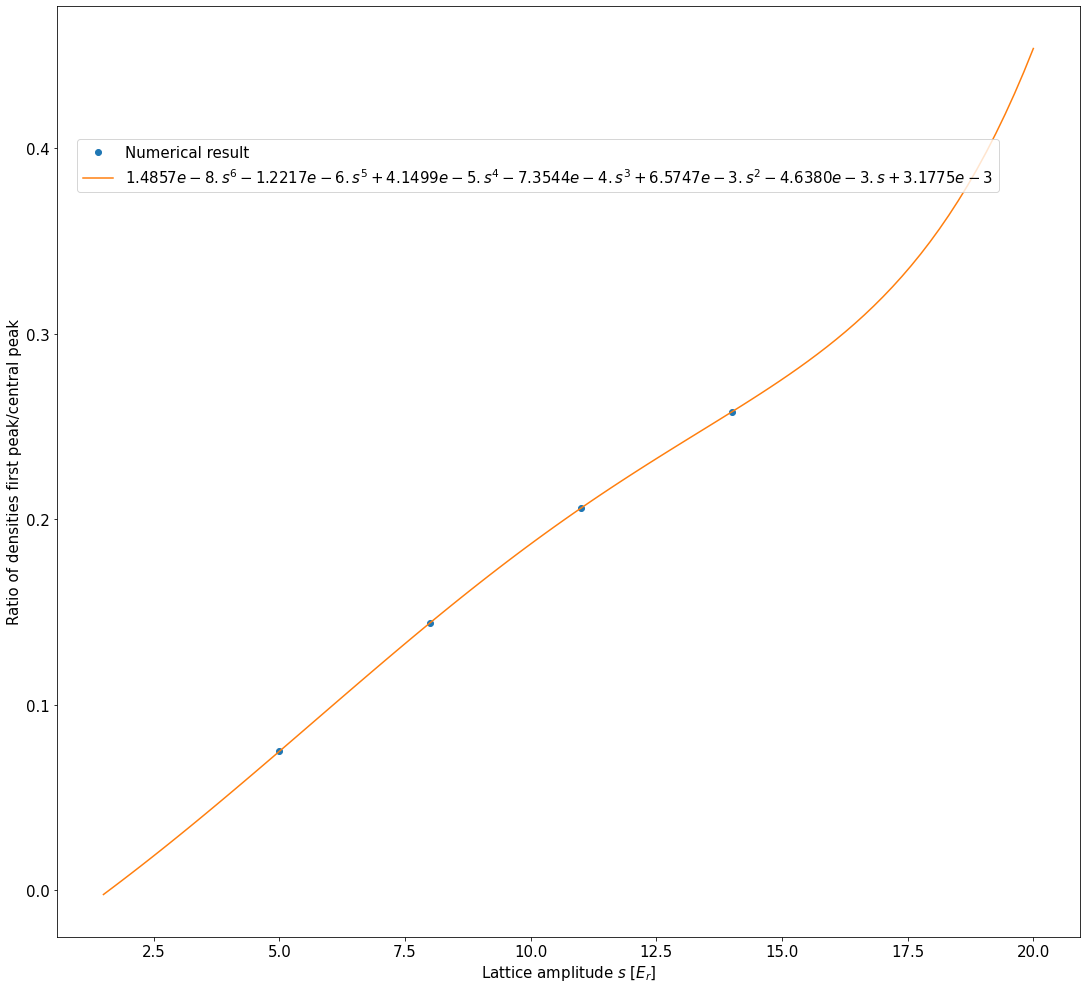

In [14]:
kval= [1, 2] # values where the FT wannier density are evaluated in units of k_d

k_index = []
for k0 in kval:
    k_index.append(np.floor(len(karr)/2+k0/(karr[1]-karr[0])).astype(int))
    
#for i in range(len(Varr)):
#    print("For a lattice amplitude ",Varr[i]," Er")
#    print("     1st peak ratio is {:.3f}".format(np.abs(FTwannier_functions[i][k_index[0]])**2))
#    print("     2nd peak ratio is {:.3f}".format(np.abs(FTwannier_functions[i][k_index[1]])**2))

ratio_peak1=[]
for i in range(len(Varr)):
    ratio_peak1.append(np.abs(FTwannier_functions[i][k_index[0]])**2)

fit_peak1 = np.polyfit(Varr, ratio_peak1, 6)
print(fit_peak1)
fit_peak1 = np.poly1d(fit_peak1)

xp = np.linspace(1.5, 20, 100)

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1,1,figsize=(16,14))
plt.plot(Varr,ratio_peak1,'o',label='Numerical result')
plt.xlabel('Lattice amplitude $s$ [$E_r$]')
plt.ylabel('Ratio of densities first peak/central peak')
plt.plot(xp,fit_peak1(xp),'-',
         label='$1.4857e-8.s^6-1.2217e-6.s^5+4.1499e-5.s^4-7.3544e-4.s^3+6.5747e-3.s^2-4.6380e-3.s+3.1775e-3$')
plt.legend(loc=[0.02,0.8])

plt.tight_layout()
plt.savefig('Calib-RatioPeak-s.pdf')
plt.show()

# Hubbard parameters

In [15]:
s = 15#12.31*9.99/9.97  # lattice depth in units of the recoil energy
size = 100  # number of lattice sites
qarr = lattice.quasimomenta(size)  # quasimomenta
n = 0  # band index
xsampl = np.linspace(-1.5, 1.5, 200)  # real-space position

Er=lattice.recoilenergy(d_latt,m)
print("Recoil energy of lattice Er= {:.3f} kHz".format(Er/h/1e3))

U, J = [], []
e, bs = lattice.eigenproblem(s, qarr, bands=n)
U=gHe*(lattice.hubbardU(xsampl, bs, scale=d_latt))**3 # cubic power for 3D problem
J=Er*lattice.hubbardJ(e, d=1)

print("On-site interaction U = {:.3f} Hz".format(U/h))
print("Tunnelling energy J = {:.3f} Hz".format(J/h))
print("Ratio U/J = {:.2f}".format(U/J))

#w = lattice.wannier(xsampl, bs)
#plt.figure()
#plt.plot(xsampl,w**3)
#print(np.max(w**3))

m_eff=hbar**2/(2*J*d_latt**2)
print("Ratio m_eff/m = {:.3f}".format(m_eff/m))

f_site=lattice.sitefreq(s*Er, d_latt, m)
print("Site frequency {:.3f} kHz".format(f_site/1e3))

Recoil energy of lattice Er= 20.761 kHz
On-site interaction U = 6247.260 Hz
Tunnelling energy J = 135.339 Hz
Ratio U/J = 46.16
Ratio m_eff/m = 15.543
Site frequency 160.816 kHz


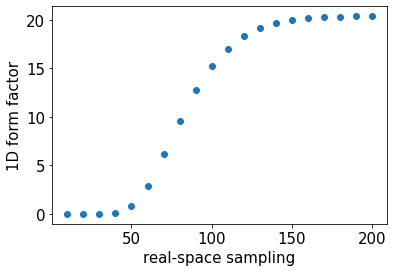

In [16]:
# Take care of the real-space sampling when calculating the onsite energy!

V = 7e4
U = []
sampling = np.arange(1, 21) * 10  # real-space position

for N in sampling:
    e, bs = lattice.eigenproblem(V, qarr, bands=n)
    xarr = np.linspace(-1.5, 1.5, N)
    U.append(lattice.hubbardU(xarr, bs))

plt.plot(sampling, U, 'o')
plt.xlabel("real-space sampling")
plt.ylabel("1D form factor")
plt.show()